#### 무게를 찾기
- 목표      : 농어(Perch) 길이 피쳐를 사용해서 무게를 예측하기
- 데이터셋  : fish.csv
- 피쳐/속성 : Length
- 타겟/라벨 : Weight
- 학습-방법 : 지도학습 > 회귀
- 알고-리즘 : 선형회귀 >>> 데이터 분포가 선형의 형태


In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
data=r'C:\Users\LG\Desktop\머신러닝\DATA\fish.csv'

In [36]:
datas= pd.read_csv(data)
datas.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [37]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [38]:
datas= pd.read_csv(data,usecols=[0,1,2])
datas.head()

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [39]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


In [40]:
datas.corr(numeric_only=True)



,Weight,Length
Weight,1.000000,0.918618
Length,0.918618,1.000000


In [41]:
features=datas[['Length']]
target=datas['Weight']
print(f'features=>{features.shape},{features.ndim}D' )
print(f'target => {target.shape},{target.ndim}D')

features=>(159, 1),2D
target => (159,),1D


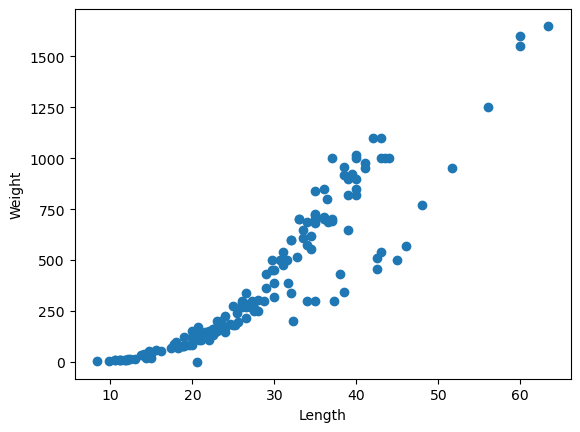

In [42]:
plt.scatter(features,target)
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

In [43]:
from sklearn.model_selection import train_test_split
import numpy as np

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, random_state=10)

In [45]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
print(f'X_train : {X_train.shape}, {X_train.ndim}D, Y_train : {Y_train.shape}, {Y_train.ndim}D')
print(f'X_test : {X_test.shape}, {X_test.ndim}D, Y_test : {Y_test.shape}, {Y_test.ndim}D')

X_train : (119, 1), 2D, Y_train : (119,), 1D
X_test : (40, 1), 2D, Y_test : (40,), 1D


In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
# 스케일러 인스턴스 생성
mmScaler=MinMaxScaler()

In [48]:
# 스케일러에 데이터셋 전용의 속성값 설정
mmScaler.fit(X_train)

MinMaxScaler()

In [52]:
mmScaler.min_, mmScaler.scale_, mmScaler.data_min_, mmScaler.data_max_

(array([-0.15272727]), array([0.01818182]), array([8.4]), array([63.4]))

In [53]:
# 학습용, 테스트용 데이터셋 스케일링 진행
mmScaler.fit_transform(X_train)
mmScaler.fit_transform(X_test)

array([[0.10174419],
       [0.31104651],
       [0.34593023],
       [0.70930233],
       [0.68023256],
       [0.375     ],
       [0.63081395],
       [0.59302326],
       [0.59302326],
       [0.49127907],
       [0.36046512],
       [0.20639535],
       [0.27325581],
       [0.68023256],
       [0.26744186],
       [0.03488372],
       [0.4622093 ],
       [0.45639535],
       [0.29360465],
       [0.41860465],
       [0.66569767],
       [0.38953488],
       [0.10755814],
       [0.48546512],
       [0.68023256],
       [0.33139535],
       [0.30232558],
       [0.4622093 ],
       [0.92732558],
       [0.        ],
       [0.33139535],
       [0.41860465],
       [0.94186047],
       [0.37209302],
       [0.31686047],
       [0.4622093 ],
       [0.75      ],
       [1.        ],
       [0.44767442],
       [0.03488372]])

In [54]:
from sklearn.neighbors import KNeighborsRegressor

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
#   학습 모델 인스턴스 생성
model = LinearRegression()


In [51]:
# 학습진행  => 최대한 많은 데이터를 만족하는 직선의 기울기와 절편 찾기
model.fit(features,target)

LinearRegression()